# **DAVI CA2 : Analyze the impact of highest qualification attained and course funding on students' academic performance and financial investment.**

### Name:Julio Ho Sheng Yang
### Student ID: P2317384
### Class: DAAA/FT/2B/03

# Data cleansing and wraggling process

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Correctly read the Excel files using pd.read_excel
coursecode_df = pd.read_excel('Data and metadata/Course Codes.xlsx')
studentprofile_df = pd.read_excel('Data and metadata/Student Profiles.xlsx')

# Display the first few rows of each dataframe to ensure they were loaded correctly
print(coursecode_df.head())
print(studentprofile_df.head())


   CourseCode                          CourseName
0        1101  Diploma in Business Administration
1        1102       Diploma in Business Analytics
2        2101        Certificate in HR Management
3        2102    Certificate in Digital Marketing
4        2013   Certificate in Tourism Management
          STUDENT ID SALUTATION GENDER  NATIONALITY LOCAL FOREIGN         DOB  \
0  2020/1101-013/001         Ms      F  Singaporean     Y          04/03/1978   
1  2020/1101-013/002         Ms      F  Singaporean     Y          23/03/1966   
2  2020/1101-013/003         Ms      F  Singaporean     Y     NaN  04/12/1988   
3  2020/1101-014/004         Ms      F  Singaporean     Y     NaN  27/11/1991   
4  2020/1101-014/005         Ms      F  Singaporean     Y          23/04/1985   

  HIGHEST QUALIFICATION              NAME OF QUALIFICATION AND INSTITUTION  \
0           Certificate                  Certificate in Office Skills, ITE   
1           Certificate  WSQ Higher Certificate in Human 

there are some missing values 

# Data cleaning

In [6]:
# Standardize columns
studentprofile_df.columns = studentprofile_df.columns.str.strip().str.upper().str.replace(' ', '_')
coursecode_df.columns = ['COURSE_CODE', 'COURSE_NAME']

# Fill missing values
studentprofile_df['LOCAL'] = studentprofile_df['LOCAL'].fillna('N')
studentprofile_df['FOREIGN'] = studentprofile_df['FOREIGN'].fillna('N')

# Standardize qualification names
studentprofile_df['HIGHEST_QUALIFICATION'] = studentprofile_df['HIGHEST_QUALIFICATION'].str.title().str.strip()


In [7]:
studentprofile_df


,STUDENT_ID,SALUTATION,GENDER,NATIONALITY,LOCAL,FOREIGN,DOB,HIGHEST_QUALIFICATION,NAME_OF_QUALIFICATION_AND_INSTITUTION,DATE_ATTAINED_HIGHEST_QUALIFICATION,DESIGNATION,INTAKE_NO,COMMENCEMENT_DATE,COMPLETION_DATE,FULL-TIME_OR_PART-TIME,COURSE_FUNDING,REGISTRATION_FEE,PAYMENT_MODE,COURSE_FEE,GPA
0,2020/1101-013/001,Ms,F,Singaporean,Y,,04/03/1978,Certificate,"Certificate in Office Skills, ITE",2016-11-06,"Snr Associate, Client Services",13th,2020-01-06,2021-04-06 00:00:00,Part-Time,Individual - SFC,107,NETS,1712,3.0
1,2020/1101-013/002,Ms,F,Singaporean,Y,,23/03/1966,Certificate,"WSQ Higher Certificate in Human Resources, WPL...",2018-02-06,Admin Officer,13th,2020-01-06,2021-04-06 00:00:00,Part-Time,Individual,107,NETS,1712,2.5
2,2020/1101-013/003,Ms,F,Singaporean,Y,N,04/12/1988,Certificate,"Nitec in Service Skills (Office), ITE",2016-11-06,Admin Assistant,13th,2020-01-06,2021-04-06 00:00:00,Part-Time,Sponsored - no SDF,107,CC JPM,1712,2.0
3,2020/1101-014/004,Ms,F,Singaporean,Y,N,27/11/1991,Degree,Bachelor Science (Facilities & Events Manageme...,2017-06-10,HR Administrator,14th,2020-03-10,2021-06-09 00:00:00,Part-Time,Individual - SFC,107,NETS,1212,2.5
4,2020/1101-014/005,Ms,F,Singaporean,Y,,23/04/1985,Diploma,"Diploma in Procurement and Supply Management, ...",2016-08-10,Purchasing Executive,14th,2020-03-10,2021-06-09 00:00:00,Part-Time,Individual - SFC,107,NETS,1712,2.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,2019/5113-007/005,Ms,F,Singaporean,Y,N,01/10/1973,Degree,Bachelor of Commerce (Accounting and Finance)/...,2017-11-05,"Head, Registry & Corp Admin",7th,2019-07-05,2020-01-04 00:00:00,Part-Time,Individual,107,Nets,5803,2.9
240,2019/5113-007/006,Ms,F,Indonesian (PR),Y,N,30/09/1982,Degree,Bachelor of Economics (Accounting)/\nUniversit...,2016-05-05,Finance Officer,7th,2019-07-05,2020-01-04 00:00:00,Part-Time,Individual,107,Nets,5803,2.0
241,2019/5113-006/003,Ms,F,Singaporean,Y,N,06/03/1990,Degree,Bachelor of Science in Hotel Administration (H...,2015-06-08,HR Assistant,6th,2019-03-08,2019-09-07 00:00:00,Part-Time,Individual,107,Nets,5803,2.8
242,2019/5113-005/001,Ms,F,Singaporean,Y,N,14/11/1981,Degree,Bachelor of Arts with Second Class Honours (Lo...,2014-08-04,Household Goods Coordinator,5th,2019-01-04,2019-07-03 00:00:00,Part-Time,Individual,107,Nets,5803,1.9


In [8]:
coursecode_df

,COURSE_CODE,COURSE_NAME
0,1101,Diploma in Business Administration
1,1102,Diploma in Business Analytics
2,2101,Certificate in HR Management
3,2102,Certificate in Digital Marketing
4,2013,Certificate in Tourism Management
5,5112,Bachelor of Business Administration
6,5113,Master of Business Administration


In [9]:
# Extract COURSE_CODE from STUDENT_ID
studentprofile_df['COURSE_CODE'] = studentprofile_df['STUDENT_ID'].apply(lambda x: int(x.split('/')[1].split('-')[0]))

# Merge datasets to get full course names
merged_df = studentprofile_df.merge(coursecode_df, on='COURSE_CODE', how='left')

# Display the merged DataFrame
print(merged_df)


            STUDENT_ID SALUTATION GENDER      NATIONALITY LOCAL FOREIGN  \
0    2020/1101-013/001         Ms      F      Singaporean     Y           
1    2020/1101-013/002         Ms      F      Singaporean     Y           
2    2020/1101-013/003         Ms      F      Singaporean     Y       N   
3    2020/1101-014/004         Ms      F      Singaporean     Y       N   
4    2020/1101-014/005         Ms      F      Singaporean     Y           
..                 ...        ...    ...              ...   ...     ...   
239  2019/5113-007/005         Ms      F      Singaporean     Y       N   
240  2019/5113-007/006         Ms      F  Indonesian (PR)     Y       N   
241  2019/5113-006/003         Ms      F      Singaporean     Y       N   
242  2019/5113-005/001         Ms      F      Singaporean     Y       N   
243  2019/5113-005/002         Ms      F      Singaporean     Y       N   

            DOB HIGHEST_QUALIFICATION  \
0    04/03/1978           Certificate   
1    23/03/1966  

now data is cleaned - use this as final dataset

---


# Chart 1: Univariate Analysis Distribution of GPA Scores Among Students
Insights: This chart will help identify the distribution of GPA scores among students, highlighting the most common performance levels.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


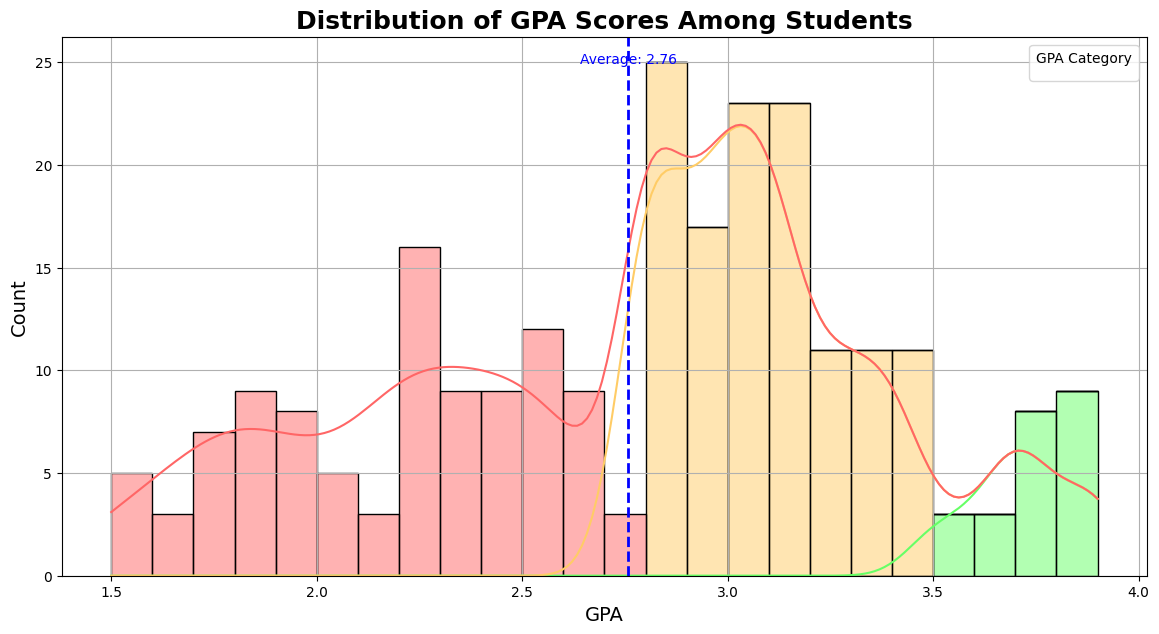

In [10]:
# Calculate the average GPA
average_gpa = studentprofile_df['GPA'].mean()

# Define the GPA categories
bins = [0, 2.76, 3.5, 4.0]
labels = ['Poor', 'Average', 'Good']
colors = ['#FF6666', '#FFCC66', '#66FF66']

# Create a new column in the DataFrame to categorize GPA scores
studentprofile_df['Category'] = pd.cut(studentprofile_df['GPA'], bins=bins, labels=labels, right=False)

# Plotting
plt.figure(figsize=(14, 7))
sns.histplot(data=studentprofile_df, x='GPA', hue='Category', palette=colors, binwidth=0.1, multiple='stack', kde=True)

# Add the average line
plt.axvline(average_gpa, color='blue', linestyle='dashed', linewidth=2)

# Annotate the average line
plt.text(average_gpa, plt.ylim()[1] * 0.95, 'Average: {:.2f}'.format(average_gpa), color='blue', ha='center')

# Add titles and labels
plt.title('Distribution of GPA Scores Among Students', fontsize=18, weight='bold')
plt.xlabel('GPA', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Show grid
plt.grid(True)

# Customize legend
plt.legend(title='GPA Category', loc='upper right', fontsize=12)

# Display the plot
plt.show()



# Analysis of chart

# GPA Analysis by Group

### Group B (Average):
- **Median GPA:** Appears to be between 2.5 and 3.0, with a significant number of students scoring in this range.
- **Distribution:** Wide in the middle, suggesting a high concentration of GPAs around the median, indicative of a normal distribution.
- **Mode GPA:** Cannot be determined without exact figures but seems to peak where the yellow bars are highest.

### Group A (Poor):
- **Median GPA:** Likely below 2.5, as indicated by the prevalence of red bars on the lower end of the GPA scale.
- **Distribution:** Fewer students have higher GPAs in this group.
- **Mode GPA:** Not determinable without additional data.

### Group C (Good):
- **Median GPA:** Likely above 3.0, with more green bars on the higher end of the GPA scale.
- **Distribution:** More students with higher GPAs compared to Groups A and B.

### Overall Insights:
- **Healthy Academic Environment:** The distribution suggests students are achieving average to good grades, with a smaller portion falling below average.
- **GPA Score Range:** The average GPA is 2.76, with scores ranging from 1.5 to 4.0.
- **Conclusion:** While students perform at all levels, the overall average falls into the ‘Average’ category.


---

# Chart 2: Bivariate Analysis : GPA vs. Course Funding Type

Insights: This chart will reveal how different types of course funding influence student academic performance, providing insights into which funding sources are associated with higher GPAs.


C:\Users\julio\AppData\Local\Temp\ipykernel_13448\3774563294.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='COURSE_FUNDING', y='GPA', data=merged_df, palette='Set3')
c:\Users\julio\anaconda3\envs\gpu_env\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 5.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


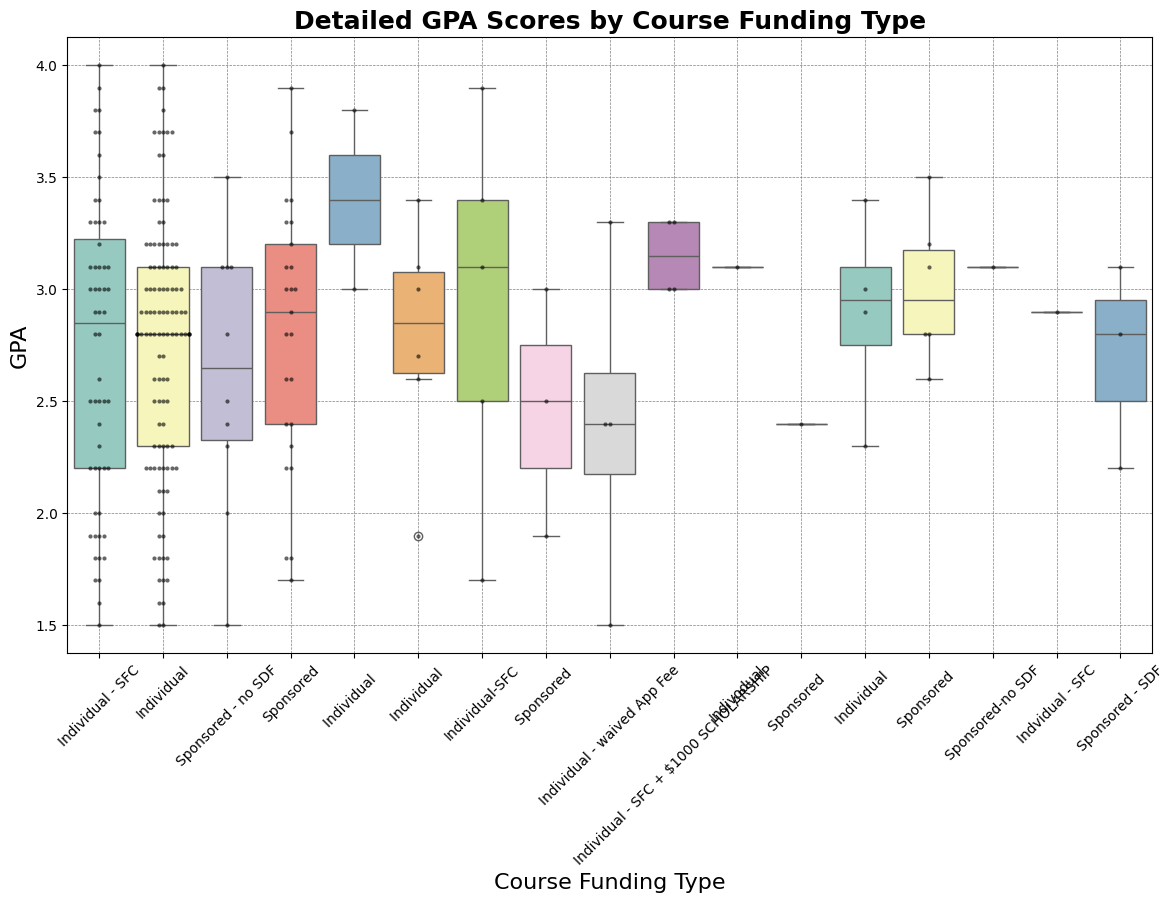

In [13]:
# Improved Plotting
plt.figure(figsize=(14, 8))
sns.boxplot(x='COURSE_FUNDING', y='GPA', data=merged_df, palette='Set3')

# Adding more detail to the plot
sns.swarmplot(x='COURSE_FUNDING', y='GPA', data=merged_df, color='black', size=3, alpha=0.6)

# Add titles and labels with increased detail
plt.title('Detailed GPA Scores by Course Funding Type', fontsize=18, weight='bold')
plt.xlabel('Course Funding Type', fontsize=16)
plt.ylabel('GPA', fontsize=16)
plt.xticks(rotation=45)

# Enhance grid visibility
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')

# Display the plot
plt.show()


# Analysis

# GPA Analysis by Funding Type

## Overview
The median GPA is around **2.5** with a wide range from **1.5 to 4.0**.

### Institutional Funding (State, Local, Federal, Private)
- These categories represent students funded by various institutional sources.
- The medians for these groups are consistently higher than the individual-funded groups, hovering around **3.0** or slightly above.
- The interquartile ranges are also narrower, indicating a more consistent GPA among institutionally funded students.

### Sponsor E, S, & C
- The median GPAs here vary, with some being comparable to institutional funding and others being lower.
- The presence of outliers in these groups suggests that there are exceptional cases where students either significantly outperform or underperform the median.

## Insights
- **Institutional Funding** is associated with higher median GPAs.
- **Individual Funding** shows more variability and generally lower median GPAs.
- The presence of outliers in all categories indicates that there are always exceptions to the general trends.

## Conclusion
Overall, it suggests that institutional funding provides a more stable and higher academic performance, while individual funding exhibits a broader range of GPAs.






---


# Chart 3: Multivariate Analysis : GPA vs. Highest Qualification and Course Funding Type

Insights: This chart will show the combined effect of highest qualification and course funding on GPA scores, offering a comprehensive view of how these factors interact to influence academic performance.

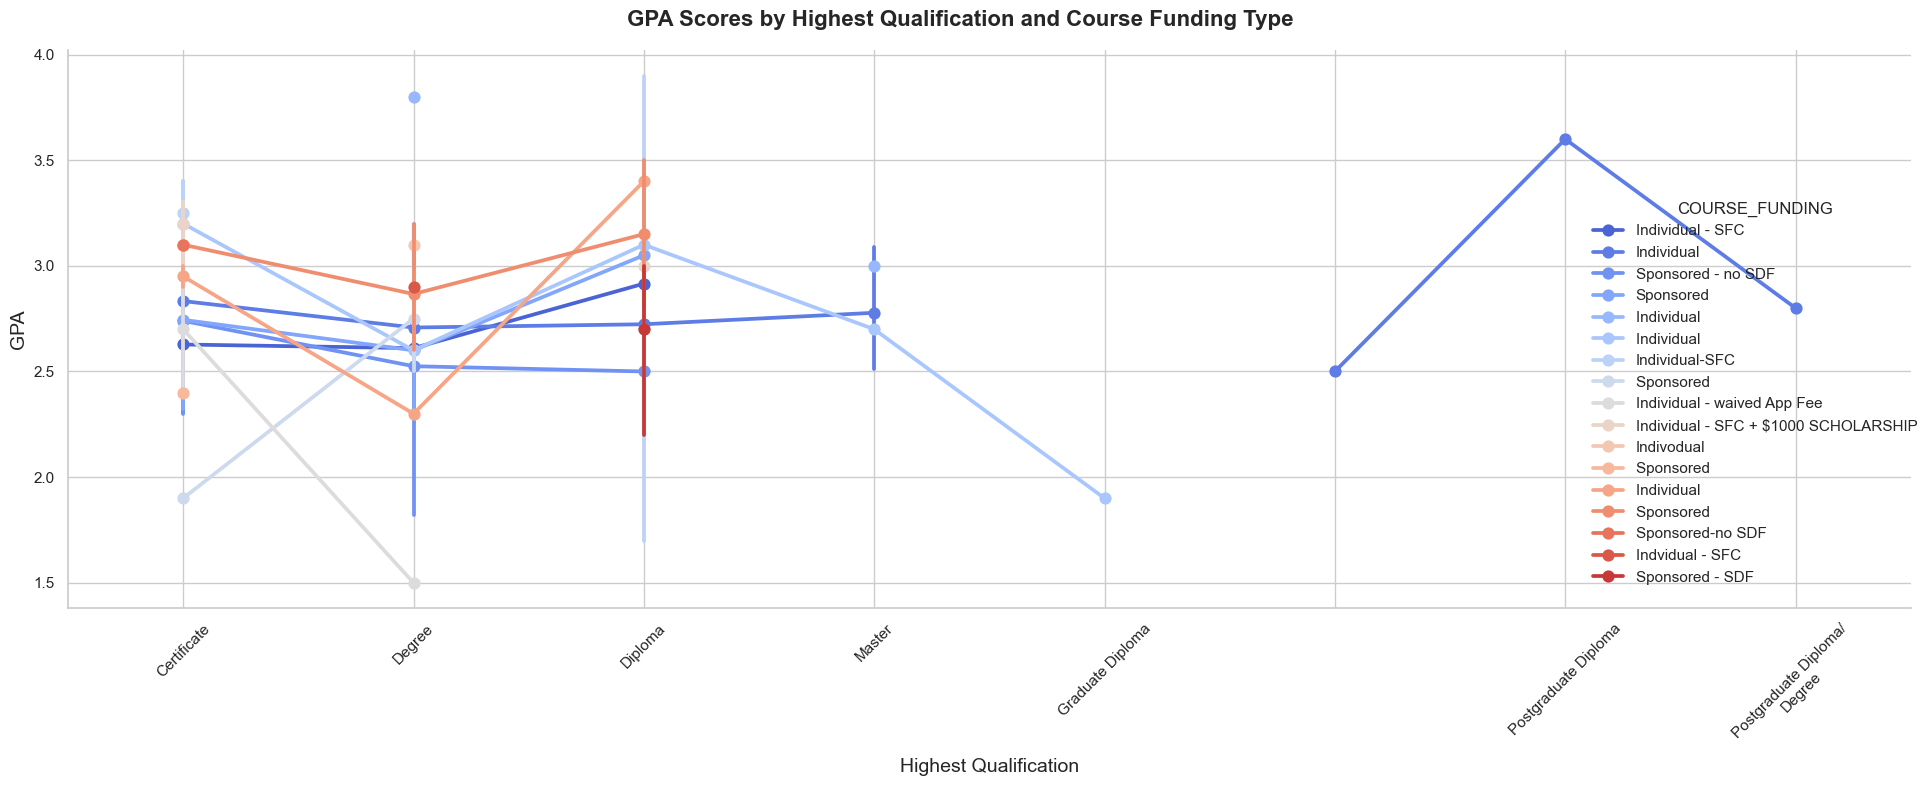

In [17]:
# Set the style
sns.set(style="whitegrid")

# Create the catplot
g = sns.catplot(
    x='HIGHEST_QUALIFICATION', 
    y='GPA', 
    hue='COURSE_FUNDING', 
    kind='point', 
    data=merged_df, 
    palette='coolwarm', 
    height=8, 
    aspect=2
)

# Add titles and labels
g.set_axis_labels("Highest Qualification", "GPA", fontsize=14)
g.fig.suptitle("GPA Scores by Highest Qualification and Course Funding Type", fontsize=16, weight='bold')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Add grid
plt.grid(True)

# Adjust layout to prevent clipping of the title
plt.tight_layout()

# Display the plot
plt.show()


- **Academic Qualifications:** The chart categorizes qualifications into different levels such as Certificate, Diploma, Bachelor’s, and Master’s degrees. This helps in comparing the academic performance across various educational backgrounds.

- **GPA Scores:** The GPA scores are plotted on the y-axis and provide a measure of academic performance. The range of GPA scores from 2.0 to 3.5 allows for an assessment of how students fare within each qualification category.

- **Course Funding:** The type of course funding, whether individual or sponsored, is represented on the chart. This aspect examines if and how the source of funding correlates with academic performance.

## - **Insights:** By analyzing the combined effect of highest qualification and course funding on GPA scores, the chart offers insights into how these factors might interact to influence a student’s academic success.

- **Impact of Qualification on GPA:** There may be a trend indicating that higher levels of qualification correlate with higher GPA scores, suggesting that students with advanced degrees might perform better academically.

- **Influence of Funding Type:** The graph could show whether there is a significant difference in GPA scores between students who are self-funded and those who are sponsored. For instance, if sponsored students have higher GPAs on average, this might imply that financial support has a positive impact on academic outcomes.

- **Interaction Effects:** The combined effect of qualification and funding type on GPA scores might reveal complex interactions. For example, the benefit of sponsorship might be more pronounced at certain qualification levels.

## - **Policy Recommendations:** Based on the analysis, educational institutions might consider tailoring their financial aid programs to target students who could benefit the most, potentially leading to improved academic performance.

---